## **APVC_Challenge_4 Group_4: Rafaela Santos & Dilan Cruz**

*Convolutional neural network to distinguish dogs from cats!
The objective of this challenge is to train a convolutional neural network that can distinguish between images of dogs and images of cats.*

## Set Up

In [2]:
import logging, os
logging.disable(logging.WARNING)
logging.disable(logging.INFO)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow as tf
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [3]:
# Define paths for training, validation, and test data
train_dir = r'C:\Users\User\Downloads\cats_and_dogs\cats_and_dogs\train'
val_dir = r'C:\Users\User\Downloads\cats_and_dogs\cats_and_dogs\validation'

# Define parameters for the dataset
batch_size = 32
img_height = 160
img_width = 160
Seed= 1245
TRAIN_VAL_SPLIT = 0.2
NUM_CLASSES= 2

# Create datasets using image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode = 'categorical',
    validation_split=TRAIN_VAL_SPLIT,
    subset="training",
    seed= Seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode = 'categorical',
    validation_split=TRAIN_VAL_SPLIT,
    subset="validation",
    seed= Seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# labels inferidas a partir dos nomes dos diretorios
labels = train_dataset.class_names
print(labels)



Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 1000 files belonging to 2 classes.
Using 200 files for validation.
['cats', 'dogs']


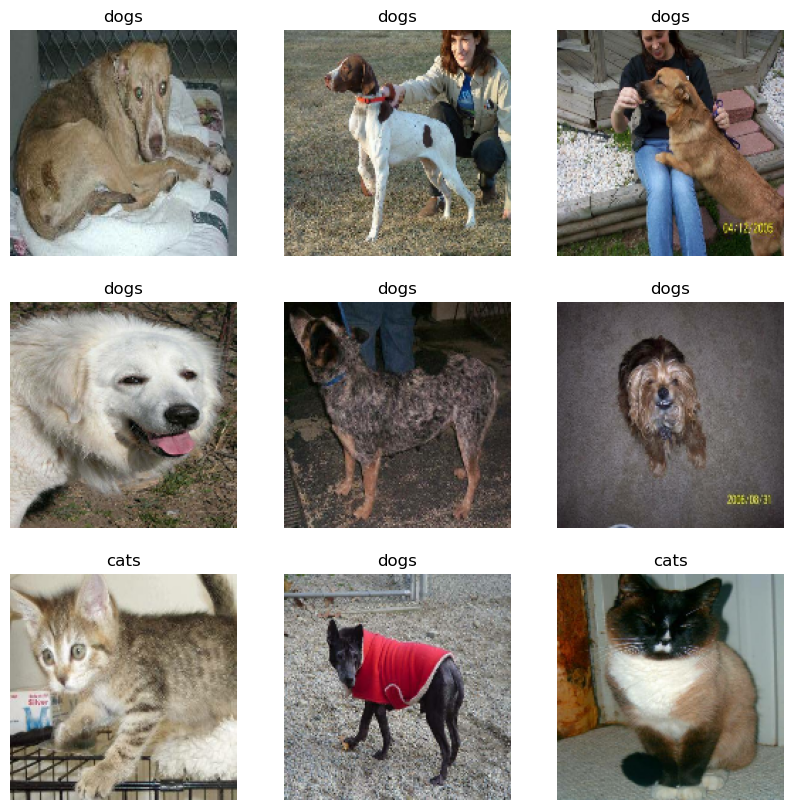

In [4]:
plt.figure(1, figsize=(10, 10))
for x_batch, y_batch in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(x_batch[i].numpy().astype("uint8"))
        plt.title(labels[np.argmax(y_batch[i,:])])
        plt.axis("off")
plt.show()

In [5]:
# optimazacoes para manter a imagens em memoria
train_dataset = train_dataset.cache()
val_dataset = val_dataset.cache()


In [6]:
# nota - os layers de data augmentation originam warnings (em versoes do tensorflow superiores a 2.8.3)
# esses warnings sao para ignorar
model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.Conv2D(8, 5, padding='same', activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Adicionei camada de Dropout
    layers.Dense(NUM_CLASSES, activation="softmax")
])


## Simple Model

In [7]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 160, 160, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 160, 160, 3)       0         
 ation)                                                          
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 8)       608       
                                                                 
 dropout (Dropout)           (None, 160, 160, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 80, 80, 8)         0         
 D)                                                     

In [9]:
EPOCHS = 10
# Train the model with both callbacks
history = model.fit(train_dataset, epochs=EPOCHS, validation_data=val_dataset)

Epoch 1/10
50/50 [==============================] - 41s 743ms/step - loss: 0.8499 - accuracy: 0.4969 - val_loss: 0.6912 - val_accuracy: 0.5200
Epoch 2/10
50/50 [==============================] - 35s 707ms/step - loss: 0.6904 - accuracy: 0.5362 - val_loss: 0.6891 - val_accuracy: 0.6250
Epoch 3/10
50/50 [==============================] - 37s 739ms/step - loss: 0.6887 - accuracy: 0.5487 - val_loss: 0.6871 - val_accuracy: 0.5700
Epoch 4/10
50/50 [==============================] - 37s 744ms/step - loss: 0.6754 - accuracy: 0.5975 - val_loss: 0.6895 - val_accuracy: 0.6000
Epoch 5/10
50/50 [==============================] - 37s 742ms/step - loss: 0.6771 - accuracy: 0.5981 - val_loss: 0.6772 - val_accuracy: 0.6200
Epoch 6/10
50/50 [==============================] - 36s 714ms/step - loss: 0.6572 - accuracy: 0.6087 - val_loss: 0.6732 - val_accuracy: 0.6050
Epoch 7/10
50/50 [==============================] - 36s 721ms/step - loss: 0.6505 - accuracy: 0.6319 - val_loss: 0.6704 - val_accuracy: 0.6000

In [10]:
# opter as predicoes e ground thruth num formato mais facil de tratar para mostrar os resultados
# (um vetor de ids das classes)
y_pred = model.predict(val_dataset)
y_pred = tf.argmax(y_pred, axis=1)

y_true = tf.concat([y for x, y in val_dataset], axis=0)
y_true = tf.argmax(y_true, axis=1)

7/7 [==============================] - 1s 127ms/step


In [11]:
# gerar graficos e matriz de confusao
cm = confusion_matrix(y_true, y_pred)

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

Text(0.5, 1.0, 'Training and Validation Loss')

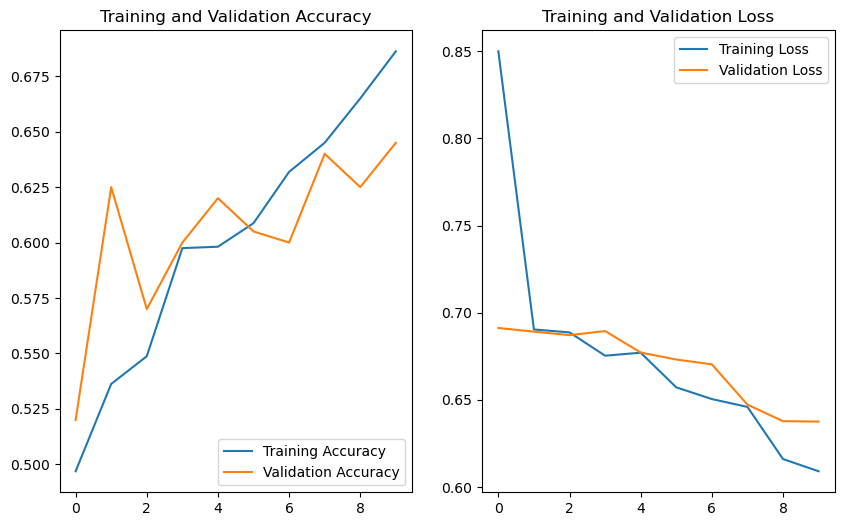

In [13]:
# evolucao da loss e acertos
plt.figure(2, figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

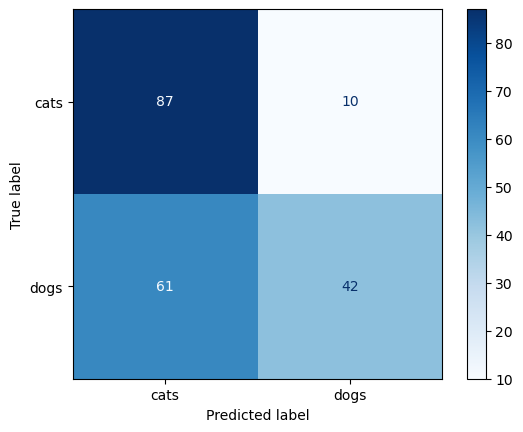

In [14]:
# matriz de confusao
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Model With Callback

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

# Adicionando o EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitorando a perda no conjunto de validação
    patience=5,           # Número de épocas sem melhoria antes da interrupção
    restore_best_weights=True  # Restaurar os melhores pesos do modelo
)

# Create a custom callback to save the model weights when validation accuracy improves
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,
    mode='max',
    save_weights_only=True,
)

# Treinamento do modelo com o EarlyStopping callback
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=val_dataset,
    callbacks=[model_checkpoint, early_stopping]# Adicionando o callback
)

# Opter as predições e ground truth num formato mais fácil de tratar para mostrar os resultados
y_pred = model.predict(val_dataset)
y_pred = tf.argmax(y_pred, axis=1)

y_true = tf.concat([y for x, y in val_dataset], axis=0)
y_true = tf.argmax(y_true, axis=1)

Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 0.6031 - accuracy: 0.6719
Epoch 1: val_accuracy improved from -inf to 0.64500, saving model to best_model_weights.h5
50/50 [==============================] - 37s 748ms/step - loss: 0.6031 - accuracy: 0.6719 - val_loss: 0.6332 - val_accuracy: 0.6450
Epoch 2/20
50/50 [==============================] - ETA: 0s - loss: 0.5915 - accuracy: 0.7075
Epoch 2: val_accuracy did not improve from 0.64500
50/50 [==============================] - 36s 728ms/step - loss: 0.5915 - accuracy: 0.7075 - val_loss: 0.6401 - val_accuracy: 0.6450
Epoch 3/20
50/50 [==============================] - ETA: 0s - loss: 0.5899 - accuracy: 0.6988
Epoch 3: val_accuracy improved from 0.64500 to 0.65500, saving model to best_model_weights.h5
50/50 [==============================] - 37s 733ms/step - loss: 0.5899 - accuracy: 0.6988 - val_loss: 0.6340 - val_accuracy: 0.6550
Epoch 4/20
50/50 [==============================] - ETA: 0s - loss: 0.5794 - accuracy:

Text(0.5, 1.0, 'Training and Validation Loss')

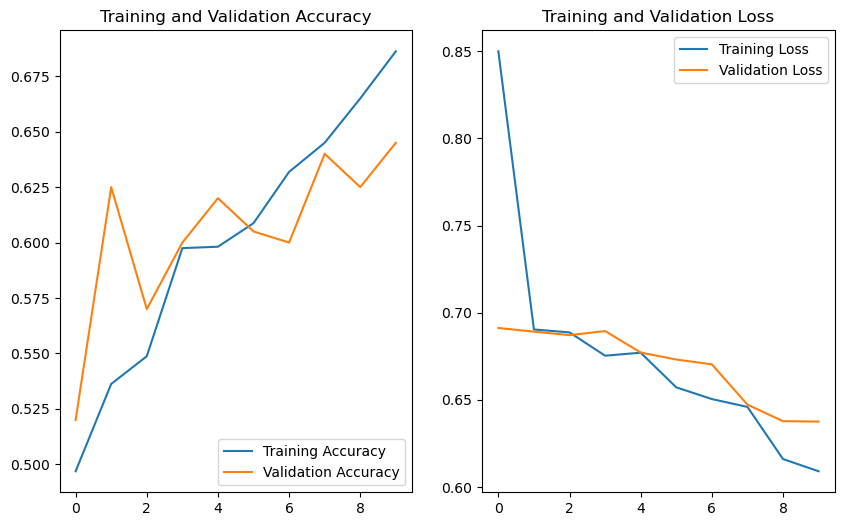

In [16]:
# evolucao da loss e acertos
plt.figure(2, figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

## Model with Image augmentation

The concept behind image augmentation is that we take existing photos from our training dataset and perform image transformation operations to them, such as rotation, shearing, translation, zooming, and so on, to create new, changed versions of those images. We don't obtain the same photos every time because of the random alterations, therefore we'll use Python generators to input these fresh images into our model during training.

The ImageDataGenerator function in the Keras framework may assist us in doing all of the prior tasks. Let's get our training and validation datasets started by setting up two of the data generators.

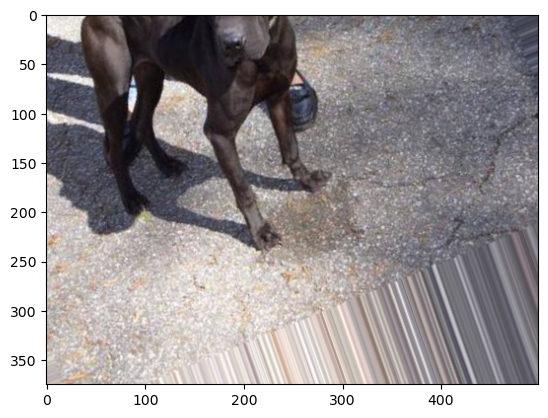

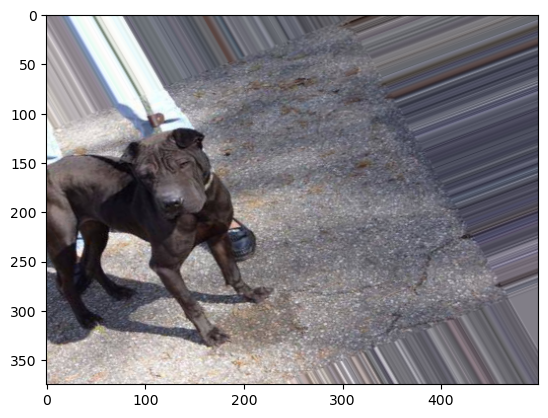

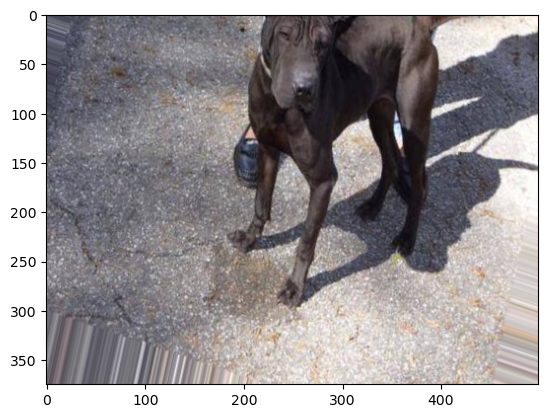

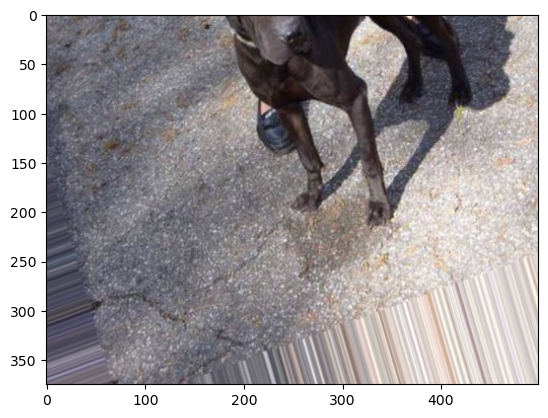

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Create an ImageDataGenerator with specified augmentations
datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=40,        # Rotate images by up to 40 degrees
    width_shift_range=0.2,    # Shift width by up to 20%
    height_shift_range=0.2,   # Shift height by up to 20%
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Zoom in by up to 20%
    horizontal_flip=True,     # Flip horizontally
    fill_mode='nearest'       # Fill empty pixels using the nearest available pixel
)

# Load an example image
img_path = r'C:\Users\User\Downloads\cats_and_dogs\cats_and_dogs\train\dogs\dog.97.jpg'
img = tf.keras.preprocessing.image.load_img(img_path)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)  # Reshape the image to (1, height, width, channels)

# Generate augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:  # Generate 4 augmented images
        break
plt.show()


In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Create an ImageDataGenerator with specified augmentations
datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=20,        # Rotate images by up to 40 degrees
    width_shift_range=0.2,    # Shift width by up to 20%
    height_shift_range=0.2,   # Shift height by up to 20%
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Zoom in by up to 20%
    horizontal_flip=True,     # Flip horizontally
    fill_mode='nearest'       # Fill empty pixels using the nearest available pixel
)


# Create a data generator to load and augment images
train_data_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to a consistent size
    batch_size=32,           # Adjust the batch size as needed
    class_mode='binary'  # Specify the problem type
)

validation_data_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),  # Resize images to a consistent size
    batch_size=32,           # Adjust the batch size as needed
    class_mode='binary'  # Specify the problem type
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
# Create a tf.data.Dataset from the ImageDataGenerator's iterator
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_data_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, ), dtype=tf.float32)
    )
)

validation_dataset = tf.data.Dataset.from_generator(
    lambda: validation_data_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, ), dtype=tf.float32)
    )
)

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import optimizers



model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


steps_per_epoch = len(validation_data_generator)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,
    mode='max',
    save_weights_only=True,
)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=8, mode='max', verbose=1)
              
history = model.fit(train_dataset, steps_per_epoch=100, epochs=50,
                              validation_data=validation_dataset, validation_steps=50, 
                              verbose=1, callbacks=[model_checkpoint, early_stopping])

Epoch 1/50
100/100 [==============================] - ETA: 0s - loss: 0.6978 - accuracy: 0.4950
Epoch 1: val_accuracy improved from -inf to 0.50064, saving model to best_model_weights.h5
100/100 [==============================] - 66s 639ms/step - loss: 0.6978 - accuracy: 0.4950 - val_loss: 0.6924 - val_accuracy: 0.5006
Epoch 2/50
100/100 [==============================] - ETA: 0s - loss: 0.6877 - accuracy: 0.5426
Epoch 2: val_accuracy improved from 0.50064 to 0.58693, saving model to best_model_weights.h5
100/100 [==============================] - 68s 680ms/step - loss: 0.6877 - accuracy: 0.5426 - val_loss: 0.6703 - val_accuracy: 0.5869
Epoch 3/50
100/100 [==============================] - ETA: 0s - loss: 0.6643 - accuracy: 0.5912
Epoch 3: val_accuracy improved from 0.58693 to 0.60889, saving model to best_model_weights.h5
100/100 [==============================] - 66s 667ms/step - loss: 0.6643 - accuracy: 0.5912 - val_loss: 0.6417 - val_accuracy: 0.6089
Epoch 4/50
100/100 [===========

Epoch 28/50
100/100 [==============================] - ETA: 0s - loss: 0.4044 - accuracy: 0.8244
Epoch 28: val_accuracy did not improve from 0.77771
100/100 [==============================] - 60s 602ms/step - loss: 0.4044 - accuracy: 0.8244 - val_loss: 0.5019 - val_accuracy: 0.7661
Epoch 29/50
100/100 [==============================] - ETA: 0s - loss: 0.3912 - accuracy: 0.8261
Epoch 29: val_accuracy did not improve from 0.77771
100/100 [==============================] - 61s 609ms/step - loss: 0.3912 - accuracy: 0.8261 - val_loss: 0.6214 - val_accuracy: 0.7113
Epoch 30/50
100/100 [==============================] - ETA: 0s - loss: 0.3744 - accuracy: 0.8291
Epoch 30: val_accuracy did not improve from 0.77771
100/100 [==============================] - 62s 620ms/step - loss: 0.3744 - accuracy: 0.8291 - val_loss: 0.5334 - val_accuracy: 0.7771
Epoch 31/50
100/100 [==============================] - ETA: 0s - loss: 0.3813 - accuracy: 0.8318
Epoch 31: val_accuracy did not improve from 0.77771
10

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

Text(0.5, 1.0, 'Training and Validation Loss')

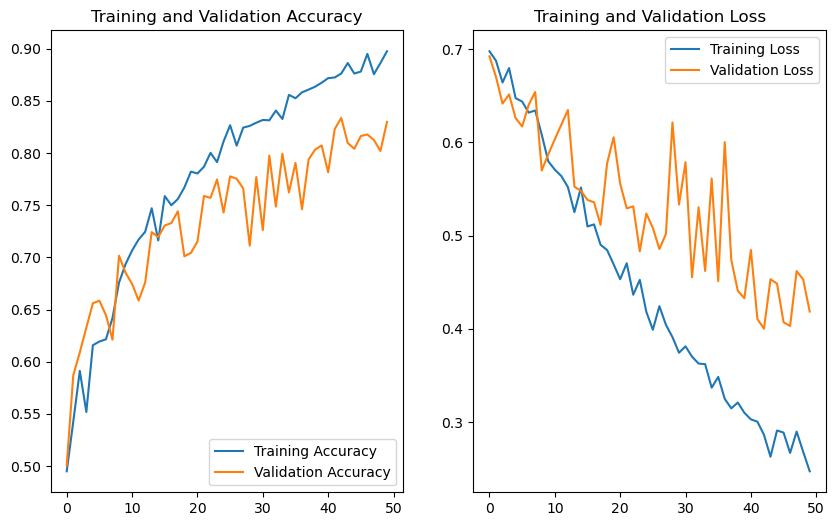

In [31]:
epochs_range = range(len(acc))  # Ensure that epochs_range matches the length of your data arrays

# Evolution of loss and accuracy
plt.figure(2, figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


In [46]:
# opter as predicoes e ground thruth num formato mais facil de tratar para mostrar os resultados
# (um vetor de ids das classes)
y_pred = model.predict(validation_dataset)
y_pred = tf.argmax(y_pred, axis=1)

y_true = validation_data_generator.labelsy_true = tf.argmax(y_true, axis=1)

   1247/Unknown - 824s 660ms/step

KeyboardInterrupt: 

In [47]:
# gerar graficos e matriz de confusao
cm = confusion_matrix(y_true, y_pred)

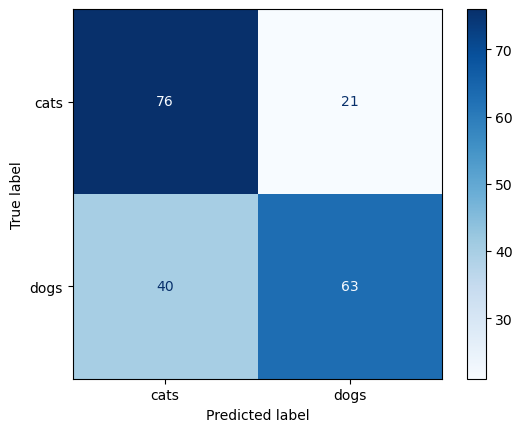

In [48]:
# matriz de confusao
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()